In [15]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [16]:
df = pd.read_csv("SMB_qPCR_result_summary_2019to2022.csv", encoding="windows-1252")
df

,Year,sampleID,Sample type,eventID,samplingSite,eventDate,recordedBy,decimalLatitude,decimalLongitude,volumeFiltered (mL),FilterType,occurrenceStatus,SMB Ct_1,SMB Ct_2,SMB Ct_3,SMB Pg/L_1,SMB Pg/L_2,SMB Pg/L_3
0,2019,r19D:1915,Field blank,2019-r19D:1915,NaN,NaN,DFO Gulf,NaN,NaN,1000,0.8 ?m Nylon,Not detected,No Ct,No Ct,No Ct,0.00,0.00,0.00
1,2019,r19D:1916,Sample,2019-r19D:1916,Site 1,8/27/2019,DFO Gulf,46.50335,-66.96510,325,0.8 ?m Nylon,Not detected,No Ct,No Ct,No Ct,0.00,0.00,0.00
2,2019,r19D:1917,Sample,2019-r19D:1917,Site 1,8/27/2019,DFO Gulf,46.50335,-66.96510,350,0.8 ?m Nylon,Not detected,No Ct,No Ct,No Ct,0.00,0.00,0.00
3,2019,r19D:1918,Sample,2019-r19D:1918,Site 1,8/27/2019,DFO Gulf,46.50335,-66.96510,425,0.8 ?m Nylon,Not detected,No Ct,No Ct,No Ct,0.00,0.00,0.00
4,2019,r19D:1919,Sample,2019-r19D:1919,Site 2,8/27/2019,DFO Gulf,46.49888,-66.95682,1000,0.8 ?m Nylon,Not detected,No Ct,No Ct,No Ct,0.00,0.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
669,2022,r22:2398,Sample,2022-r22:2398,Site 5,7/20/2022,DFO Gulf,46.50753,-66.94977,1000,1.2 ?m Glass Fiber,Suspected,36.14,No Ct,35.02,8.70,0.00,17.59
670,2022,r22:2399,Sample,2022-r22:2399,Site 5,7/20/2022,DFO Gulf,46.50753,-66.94977,1000,1.2 ?m Glass Fiber,Suspected,37.11,34.62,33.08,4.71,22.64,59.79
671,2022,r22:2400,Sample,2022-r22:2400,Site 5,7/20/2022,DFO Gulf,46.50753,-66.94977,1000,1.2 ?m Glass Fiber,Suspected,36.1,34.39,34.97,8.92,26.20,18.14
672,2022,r22:2401,Field blank,2022-r22:2401,NaN,7/20/2022,DFO Gulf,NaN,NaN,1000,1.2 ?m Glass Fiber,Not detected,No Ct,No Ct,No Ct,0.00,0.00,0.00


In [17]:
# ok let's clean up the table
# first, we do not want any of the field blanks in the table
mask = df["Sample type"].str.match(".*blank") == False
df = df[mask]
df = df.dropna(subset=["decimalLatitude", "decimalLongitude"])

In [18]:
# general question: where any two samples taken in the exact same spot?
print(df.shape[0], len(df["decimalLatitude"].unique()))
print(df.shape[0], len(df["decimalLongitude"].unique()))
# looks likely that there are repeat samples ... lots of them
print(df["decimalLatitude"].value_counts())



526 115
526 115
46.50753    33
46.49828    20
46.57370    18
46.51053    13
46.56064    13
            ..
46.48183     1
46.51639     1
46.50809     1
46.45410     1
46.53499     1
Name: decimalLatitude, Length: 115, dtype: int64


In [19]:
# take a value where there are more than one count
df[df["decimalLatitude"] == 46.50753]
# so for example site 5 seems to all have the same coordinates


,Year,sampleID,Sample type,eventID,samplingSite,eventDate,recordedBy,decimalLatitude,decimalLongitude,volumeFiltered (mL),FilterType,occurrenceStatus,SMB Ct_1,SMB Ct_2,SMB Ct_3,SMB Pg/L_1,SMB Pg/L_2,SMB Pg/L_3
62,2019,r19D:2029,Sample,2019-r19D:2029,Site 5,9/12/2019,DFO Gulf,46.50753,-66.94977,1000,0.8 ?m Nylon,Suspected,38.38,39.12,37.83,0.85,0.52,1.22
65,2019,r19D:2032,Sample,2019-r19D:2032,Site 5,9/12/2019,DFO Gulf,46.50753,-66.94977,1000,0.8 ?m Nylon,Suspected,No Ct,37.22,37.76,0.00,1.85,1.28
137,2020,r20:2187,Sample,2020-r20:2187,Site 5,8/26/2020,DFO Gulf,46.50753,-66.94977,1000,0.8 ?m Nylon,Suspected,35.47,34.18,NaN,5.96,14.15,NaN
138,2020,r20:2188,Sample,2020-r20:2188,Site 5,8/26/2020,DFO Gulf,46.50753,-66.94977,1000,0.8 ?m Nylon,Suspected,35.97,35.36,NaN,4.27,6.43,NaN
139,2020,r20:2189,Sample,2020-r20:2189,Site 5,8/26/2020,DFO Gulf,46.50753,-66.94977,1000,0.8 ?m Nylon,Suspected,34.94,37.1,NaN,8.49,2.00,NaN
210,2020,r20:2440,Sample,2020-r20:2440,Site 5,8/20/2020,ARM,46.50753,-66.94977,1000,0.8 ?m Nylon,Suspected,35.48,36.22,NaN,5.92,3.61,NaN
211,2020,r20:2441,Sample,2020-r20:2441,Site 5,8/20/2020,ARM,46.50753,-66.94977,750,0.8 ?m Nylon,Suspected,34.6,35.9,NaN,10.65,4.48,NaN
213,2020,r20:2507,Sample,2020-r20:2507,Site 5,8/20/2020,ARM,46.50753,-66.94977,1000,0.8 ?m Nylon,Suspected,37.53,35.56,NaN,1.50,5.63,NaN
228,2020,r20:2525,Sample,2020-r20:2525,Site 5,9/1/2020,DFO Gulf,46.50753,-66.94977,1000,0.8 ?m Nylon,Suspected,35.48,36.01,NaN,5.91,4.15,NaN
229,2020,r20:2526,Sample,2020-r20:2526,Site 5,9/1/2020,DFO Gulf,46.50753,-66.94977,1000,0.8 ?m Nylon,Not detected,No Ct,No Ct,NaN,0.00,0.00,NaN


In [20]:
# are all latitude observations positive?
print(sum(df["decimalLatitude"] < 0))
# are all latitude observations negative?
print(sum(df["decimalLongitude"] > 0))
# clean the site names
df["samplingSite"] = df["samplingSite"].apply(lambda x: str(x).strip())
df["samplingSite"] = df["samplingSite"].replace("nan", "missing").replace("", "missing")
# for fun, lets order the table by date
df["eventDate"] = pd.to_datetime(df["eventDate"], format="%m/%d/%Y")
df = df.sort_values("eventDate")

0
0


In [21]:
color_map = {
    'Not detected': "green",
    'Suspected': "orange",
    'Inconclusive': "grey",
    'Detected': "red",
}
colors = df["occurrenceStatus"].map(color_map)
x = df["decimalLongitude"]
y = df["decimalLatitude"]

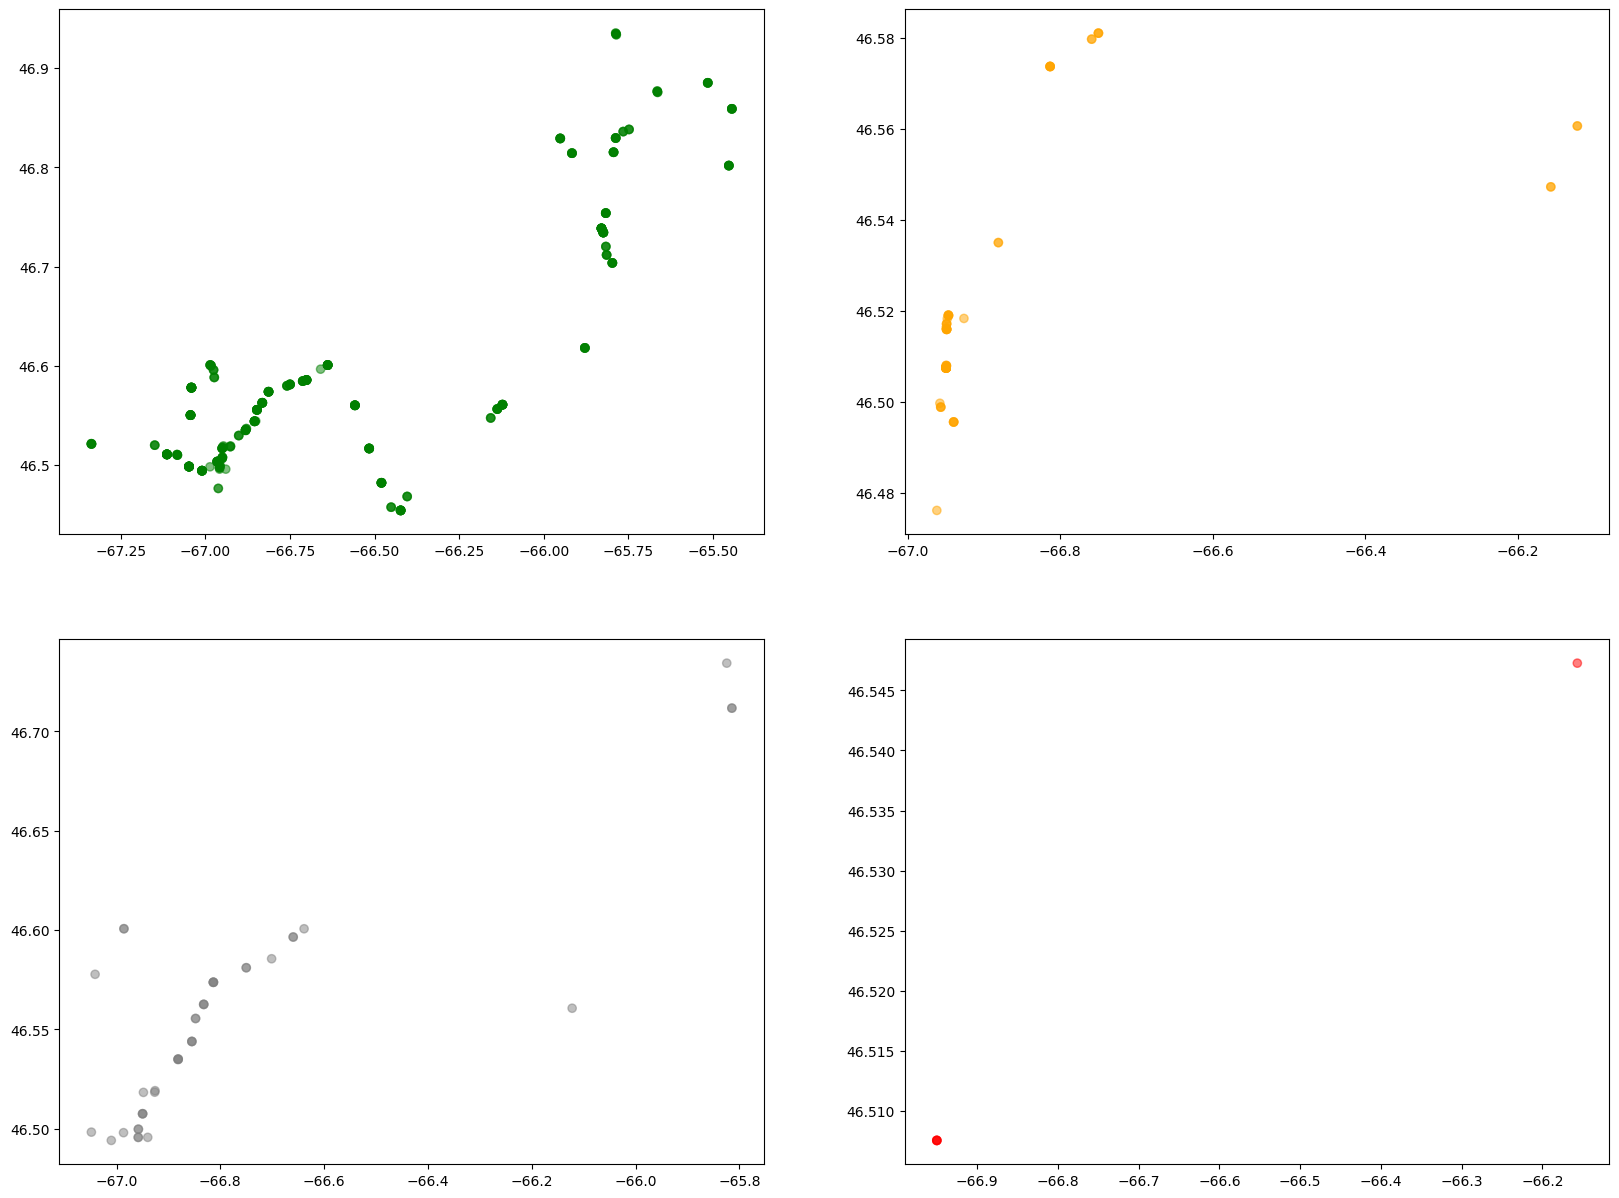

In [22]:
nrow = 2
ncol = 2
rows = range(0, nrow)
cols = range(0, ncol)
fig, axs = plt.subplots(nrow, ncol, figsize=(20, 15))

i = 0
for row in rows:
    for col in cols:
        ax = axs[row, col]
        color = colors.unique()[i]
        ax.scatter(x[colors == color], y[colors == color], c=colors[colors == color], alpha=0.5)
        i += 1

plt.show()

In [23]:
# which columns do we want to include in the final product?
# subdf=df.loc[:,["sampleID", 'Year', 'eventDate', 'recordedBy', 'decimalLatitude', 'decimalLongitude', 'occurrenceStatus', 'color']]

# now let's deal with the tricky problem of the duplicate lat longs. This will really improve the viewing experience
subdf = df.loc[:, ["decimalLatitude", "decimalLongitude"]].drop_duplicates().copy()
subdf.columns = ["Latitude", "Longitude"]
subdf

,Latitude,Longitude
1,46.50335,-66.96510
30,46.51896,-66.94663
29,46.51906,-66.94672
28,46.51916,-66.94681
27,46.51828,-66.94820
...,...,...
535,46.46809,-66.40372
543,46.55625,-66.13745
526,46.58444,-66.71226
561,46.59647,-66.65959


In [24]:
# start building the columns of the new df
sites = list()
sample_ids = list()
years = list()
event_dates = list()
recorded_bys = list()
occurrence_statuses = list()


# subdf.columns = ["Sample ID", 'year', 'Event Date', 'Recorded By', 'Latitude', 'Longitude', 'Occurrence Status', 'Color (mapping)']
def clean_list(l):
    return str([item for item in l]).replace("'", "").replace("[", "").replace("]", "")#.replace(",", "/")


for index, row in subdf.iterrows():
    # using the lat/long, we will query the full df
    lat = row[0]
    lng = row[1]
    mask = (df["decimalLatitude"] == lat) & (df["decimalLongitude"] == lng)
    sites.append(clean_list(df[mask]["samplingSite"].unique()))
    sample_ids.append(clean_list(df[mask]["sampleID"].unique()))
    years.append(clean_list(df[mask]["Year"].unique()))
    event_dates.append(clean_list([str(d).split("T")[0] for d in df[mask]["eventDate"].unique()]))
    recorded_bys.append(clean_list(df[mask]["recordedBy"].unique()))
    occurrence_statuses.append(clean_list(df[mask]["occurrenceStatus"].unique()))

subdf["Site"] = sites
subdf["Sample IDs"] = sample_ids
subdf["Year"] = years
subdf["Event Date"] = event_dates
subdf["Recorded By"] = recorded_bys
subdf["Occurrence Status"] = occurrence_statuses

subdf

,Latitude,Longitude,Site,Sample IDs,Year,Event Date,Recorded By,Occurrence Status
1,46.50335,-66.96510,Site 1,"r19D:1916, r19D:1918, r19D:1917, r20:2422","2019, 2020","2019-08-27, 2020-08-20","DFO Gulf, ARM",Not detected
30,46.51896,-66.94663,Site 9,r19D:1945,2019,2019-08-27,DFO Gulf,Suspected
29,46.51906,-66.94672,Site 9,"r19D:1944, r20:2652, r20:2651, r20:2649","2019, 2020","2019-08-27, 2020-09-10",DFO Gulf,"Suspected, Not detected"
28,46.51916,-66.94681,Site 9,r19D:1943,2019,2019-08-27,DFO Gulf,Suspected
27,46.51828,-66.94820,Site 8,r19D:1942,2019,2019-08-27,DFO Gulf,Inconclusive
...,...,...,...,...,...,...,...,...
535,46.46809,-66.40372,Site 61,"r21:3244, r21:3245, r21:3247",2021,2021-07-28,DFO Gulf,Not detected
543,46.55625,-66.13745,Site 63,"r21:3252, r21:3253, r21:3254, r22:2290, r22:22...","2021, 2022","2021-07-28, 2022-07-15",DFO Gulf,Not detected
526,46.58444,-66.71226,Site 19A,"r21:3235, r21:3233, r21:3234, r22:2276, r22:22...","2021, 2022","2021-07-28, 2022-07-13",DFO Gulf,Not detected
561,46.59647,-66.65959,Site 20A,"r22:2280, r22:2278, r22:2279",2022,2022-07-13,DFO Gulf,"Inconclusive, Not detected"


In [25]:
# how to deal with the occurrences
df["occurrenceStatus"].unique()


def cleaner_func(x):
    if "Detected" in x:
        return "Detected"
    elif "Suspected" in x:
        return "Suspected"
    elif "Inconclusive" in x:
        return "Inconclusive"
    else:
        return "Not detected"


subdf["Occurrence Status"] = subdf["Occurrence Status"].apply(lambda x: cleaner_func(x))
subdf["Color (mapping)"] = subdf["Occurrence Status"].map(color_map)
subdf

,Latitude,Longitude,Site,Sample IDs,Year,Event Date,Recorded By,Occurrence Status,Color (mapping)
1,46.50335,-66.96510,Site 1,"r19D:1916, r19D:1918, r19D:1917, r20:2422","2019, 2020","2019-08-27, 2020-08-20","DFO Gulf, ARM",Not detected,green
30,46.51896,-66.94663,Site 9,r19D:1945,2019,2019-08-27,DFO Gulf,Suspected,orange
29,46.51906,-66.94672,Site 9,"r19D:1944, r20:2652, r20:2651, r20:2649","2019, 2020","2019-08-27, 2020-09-10",DFO Gulf,Suspected,orange
28,46.51916,-66.94681,Site 9,r19D:1943,2019,2019-08-27,DFO Gulf,Suspected,orange
27,46.51828,-66.94820,Site 8,r19D:1942,2019,2019-08-27,DFO Gulf,Inconclusive,grey
...,...,...,...,...,...,...,...,...,...
535,46.46809,-66.40372,Site 61,"r21:3244, r21:3245, r21:3247",2021,2021-07-28,DFO Gulf,Not detected,green
543,46.55625,-66.13745,Site 63,"r21:3252, r21:3253, r21:3254, r22:2290, r22:22...","2021, 2022","2021-07-28, 2022-07-15",DFO Gulf,Not detected,green
526,46.58444,-66.71226,Site 19A,"r21:3235, r21:3233, r21:3234, r22:2276, r22:22...","2021, 2022","2021-07-28, 2022-07-13",DFO Gulf,Not detected,green
561,46.59647,-66.65959,Site 20A,"r22:2280, r22:2278, r22:2279",2022,2022-07-13,DFO Gulf,Inconclusive,grey


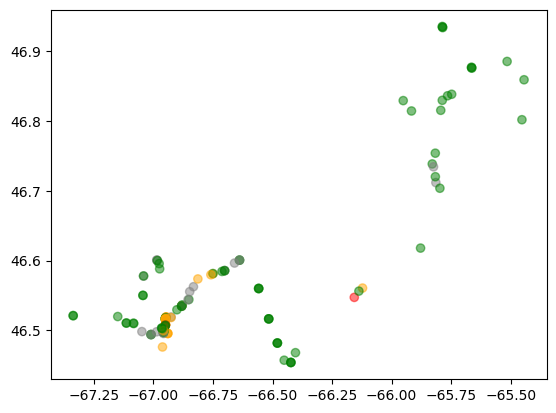

In [26]:
# re-plotting
x = subdf["Longitude"]
y = subdf["Latitude"]
colors = subdf["Color (mapping)"]
plt.scatter(x, y, c=colors, alpha=0.5)
plt.show()

In [27]:
# write the final dataframe to a CSV
subdf.to_csv("./SMB_eDNA_WMS_english.csv", index=False)
# display
subdf

,Latitude,Longitude,Site,Sample IDs,Year,Event Date,Recorded By,Occurrence Status,Color (mapping)
1,46.50335,-66.96510,Site 1,"r19D:1916, r19D:1918, r19D:1917, r20:2422","2019, 2020","2019-08-27, 2020-08-20","DFO Gulf, ARM",Not detected,green
30,46.51896,-66.94663,Site 9,r19D:1945,2019,2019-08-27,DFO Gulf,Suspected,orange
29,46.51906,-66.94672,Site 9,"r19D:1944, r20:2652, r20:2651, r20:2649","2019, 2020","2019-08-27, 2020-09-10",DFO Gulf,Suspected,orange
28,46.51916,-66.94681,Site 9,r19D:1943,2019,2019-08-27,DFO Gulf,Suspected,orange
27,46.51828,-66.94820,Site 8,r19D:1942,2019,2019-08-27,DFO Gulf,Inconclusive,grey
...,...,...,...,...,...,...,...,...,...
535,46.46809,-66.40372,Site 61,"r21:3244, r21:3245, r21:3247",2021,2021-07-28,DFO Gulf,Not detected,green
543,46.55625,-66.13745,Site 63,"r21:3252, r21:3253, r21:3254, r22:2290, r22:22...","2021, 2022","2021-07-28, 2022-07-15",DFO Gulf,Not detected,green
526,46.58444,-66.71226,Site 19A,"r21:3235, r21:3233, r21:3234, r22:2276, r22:22...","2021, 2022","2021-07-28, 2022-07-13",DFO Gulf,Not detected,green
561,46.59647,-66.65959,Site 20A,"r22:2280, r22:2278, r22:2279",2022,2022-07-13,DFO Gulf,Inconclusive,grey


In [28]:
# now to frenchifry...
subdf_fr = subdf.copy()
# print(subdf.columns)
subdf_fr.columns = [
    "Latitude",
    "Longitude",
    "Site de l'échantillon",
    "ID de l'échantillon",
    "Année",
    "Date de l'événement",
    "Enregistré par",
    "Statut de l'événement",
    "Couleur (cartographie)"
]

# convert the occurrences
fr_map = {
    'Not detected': "Non détecté",
    'Suspected': "Suspecté",
    'Inconclusive': "Non concluant",
    'Detected': "Détecté",
}
subdf_fr["Statut de l'événement"] = subdf_fr["Statut de l'événement"].map(fr_map)

# write the final dataframe to a CSV
subdf_fr.to_csv("./SMB_eDNA_WMS_francais.csv", index=False)
# display
subdf_fr


,Latitude,Longitude,Site de l'échantillon,ID de l'échantillon,Année,Date de l'événement,Enregistré par,Statut de l'événement,Couleur (cartographie)
1,46.50335,-66.96510,Site 1,"r19D:1916, r19D:1918, r19D:1917, r20:2422","2019, 2020","2019-08-27, 2020-08-20","DFO Gulf, ARM",Non détecté,green
30,46.51896,-66.94663,Site 9,r19D:1945,2019,2019-08-27,DFO Gulf,Suspecté,orange
29,46.51906,-66.94672,Site 9,"r19D:1944, r20:2652, r20:2651, r20:2649","2019, 2020","2019-08-27, 2020-09-10",DFO Gulf,Suspecté,orange
28,46.51916,-66.94681,Site 9,r19D:1943,2019,2019-08-27,DFO Gulf,Suspecté,orange
27,46.51828,-66.94820,Site 8,r19D:1942,2019,2019-08-27,DFO Gulf,Non concluant,grey
...,...,...,...,...,...,...,...,...,...
535,46.46809,-66.40372,Site 61,"r21:3244, r21:3245, r21:3247",2021,2021-07-28,DFO Gulf,Non détecté,green
543,46.55625,-66.13745,Site 63,"r21:3252, r21:3253, r21:3254, r22:2290, r22:22...","2021, 2022","2021-07-28, 2022-07-15",DFO Gulf,Non détecté,green
526,46.58444,-66.71226,Site 19A,"r21:3235, r21:3233, r21:3234, r22:2276, r22:22...","2021, 2022","2021-07-28, 2022-07-13",DFO Gulf,Non détecté,green
561,46.59647,-66.65959,Site 20A,"r22:2280, r22:2278, r22:2279",2022,2022-07-13,DFO Gulf,Non concluant,grey
